# Final Project Submission

- Student Name: Deztany Jackson
- Student Pace: Self Pace
- Scheduled Project Review: April 7, 2023
- Instructor Name: Morgan Jones



Main Library Elemenets:
[Checklist](https://docs.google.com/document/d/1swj3BthL_M1IzJzkOmzhCWc595sRC6WrFI8S-xTKCr0/edit)

## Business Understanding

# Clean up later
- Real estate company (Primary Stakeholder) wanting to partner with the local pet adoption agency
    - Adoption, Animals, Buyers/Sellers (potential adoptees), Adoptees (potenial customers), Data Scientist
    - Wants to minimize danger and make neighbor hoods attractive while caring for animals and potentially getting customers to to think about housing needs and pet adoption at same time
Assumptions:
    - The RE is not a SME in adoption and animals, so they only care if an animal wiill be adopted by closing - Binary Classification
    [https://towardsdatascience.com/the-3-most-important-basic-classification-metrics-3368dd425f74](https://towardsdatascience.com/the-3-most-important-basic-classification-metrics-3368dd425f74)
    - Want Precision to maximize TP and minimize FP of adoptees when I have results that tell me a lot of animals will be adopted.  Dont want to sell or rent and put integrity on line...
    - RE agents care about knowing the true total when the TP is low and a higher FN.. ...Recall
Questions: 
    - What is the average time until close
    - What happens with most animals when people are evicted?
    - Why are most animals given up for adoption?
    - What area are we focused on?
Metrics:
    AUC-ROC True Positive Rate against False Positive Rate
    Minimize False Positives (Precision)

@misc{petfinder-adoption-prediction,
    author = {Addison Howard, MichaelApers, Mongrel Jedi},
    title = {PetFinder.my Adoption Prediction},
    publisher = {Kaggle},
    year = {2018},
    url = {https://kaggle.com/competitions/petfinder-adoption-prediction}
}

#Info on Malaysian Stray animals

#https://vetfuturist.com/stray-animals-malaysia-reality-i-saw-travelling-there-past-months

## Import Libraries

In [143]:
import os
import glob

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import ConfusionMatrixDisplay,classification_report,recall_score,accuracy_score, auc
from sklearn.metrics import precision_score, f1_score,RocCurveDisplay
from sklearn.metrics import precision_recall_curve,average_precision_score, make_scorer
from sklearn.metrics import PrecisionRecallDisplay, PredictionErrorDisplay
 
from sklearn.metrics import confusion_matrix as cm

from sklearn import tree

# Import tensorflow stuff from Model 4

import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

## Data Import

In [2]:
cur_dir = os.getcwd()
cur_dir

'/Users/deztanyjackson/Documents/0_Flatiron/Capstone_P5'

In [3]:
# Import training csv file
org_train_df = pd.read_csv("data/train/train.csv")
test_df = pd.read_csv("data/test/test.csv")
state_df = pd.read_csv("data/StateLabels.csv")
color_df = pd.read_csv("data/ColorLabels.csv")
breed_df = pd.read_csv("data/BreedLabels.csv")

state_df
Selangor - High Std of living and lowest poverty rating https://en.wikipedia.org/wiki/Selangor
    - Population of Mass (3.1 Mill) a little larger than Delware (2,489 mi²)
Malaysia Stray Info: https://vetfuturist.com/stray-animals-malaysia-reality-i-saw-travelling-there-past-months

This reference is wrong find right one...was loan predicitons
[Loan Classification,Kamal Khumar, 2021 ](https://www.kaggle.com/code/kamalkhumar/loan-status-prediction)

## Data Understanding

Questions: With the predictions insights... If understanding the type of animal and features...where is it best to place it in state
    - Telling customers predictions on adoptions and selling point (May like the area but these but mostly wont be adopted, many stra)
    - Where the most strays (location)
    - Help with those that are thinking of leaving home

### Dataset Description

# Come back to the Categorical Values of the AdoptionSpeed
# Check Nominal, Cardinal and Ordinal
Cardinal numbers, known as the “counting numbers,” indicate quantity. Ordinal numbers indicate the order or rank of things in a set (e.g., sixth in line; fourth place). Nominal numbers name or identify something (e.g., a zip code or a player on a team.) They do not show quantity or rank.

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Feature </th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Data Type</th> 
</tr>
</thead>
<tbody>
<td><b>Type</b></td>
<td>Type of Animal<br> (1=Dog,2=Cat)</td>
<td>Nominal Number</td>    
<tr> 
<td><b>Name</b></td>
<td>Name of Pet<br> (Empty if not named)</td>
<td>String</td>
</tr>
<tr> 
<td><b>Age</b></td>
<td>Age of pet when listed<br> (Months)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Breed</b></td>
<td>Breed1 (Primary breed),Breed2 (Secondary breed, if mixed) <br> (Ref Breedlabels dict)</td>
<td>Nominal Number:String </td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Gender of pet <br> 1=Male, 2=Female, 3=Mixed, if profile represents group of pets)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Color</b></td>
<td>Colors of pets<br>Ref Colorlabels dict</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Maturity Size</b></td>
<td>Number of Rooms <br>(1=Sm, 2=Med,3=Lg,4=XLg,0=Not Spec)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Fur Length</b></td>
<td>Fur Length<br>(1=Shrt, 2=Med,3=Lg,4=Lng,0=Not Spec) </td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Vaccinated</b></td>
<td>Pet has been vaccinated<br>(1=Yes,2=No,3=Not Sure)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Dewormed</b></td>
<td>Pet has been dewormed<br>(1=Yes,2=No,3=Not Sure)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Sterilized</b></td>
<td>Pet has been spayed/neutered<br>(1=Yes,2=No,3=Not Sure)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Health</b></td>
<td>Health Condition<br>(1=Healthy,2=Minor Inj,3=Serious Inj,0=Not Spec)</td>
<td>Nominal</td>
</tr>
<tr>
<td><b>Quantity</b></td>
<td>Number of pets represented in profile<br></td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Fee</b></td>
<td>Adoption fee<br> (0=Free)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>state</b></td>
<td>State location in Malaysia <br>(Ref to StateLabels dict)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>RescuerID</b></td>
<td>Unique hash ID of rescuer <br></td>
<td>String</td>
</tr>
<tr>
<td><b>VideoAmt</b></td>
<td>Total uploaded videos for pet <br></td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>PhotoAmt</b></td>
<td>Total uploaded videos for pet <br></td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Description</b></td>
<td>Profile write-up <br>(Primarily Eng, also Malay or Chinese)</td>
<td>String Object</td>  
</tr>
<tr>    
<td><b>AdoptionSpreed</b></td>
<td>Categorical speed of adoption. Lower is faster.<br></td>
<td>Nominal Number</td>  
</tr>
<tr>    
<td><b>PetID</b></td>
<td>Unique hash ID of pet profile<br></td>
<td>String Object</td> 
</tbody>
</table>

### Exploring Dataset

The dataset from Kaggle had several files that will be used in the modeling effort.<br>
- Training set (14993 entries)
- Test set (3972 entries) 
- Breed labels (307 entries)
- Color labels ( 7 entries)
- State labels (15 entries)

In [4]:
#Copy original dataset
train_df = org_train_df.copy()

EDA CHeatsheet https://datasans.medium.com/exploratory-data-analysis-cheatsheet-everything-you-might-need-36230538484d
Review the values for the labels
Review missing values
review odd inputs for values (naan,)
review columns that are not needed
look at any imbalances
correlation map
    Do any need to be removed
histogram
check for outliers with scattering

bar graph of primary correlated values
use describe...
What insights can you get from the percentages and plots
Does anything need to be standardized?  Do we standardize categorical numbers?
What plots will we use


In [5]:
train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
train_df.info()
#Notice the objects, nulls and amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [7]:
#Review
train_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [8]:
#Describe
#Most of animals are puppies or kittens
#There a few outliers for expensive prices, but most are under 30, most are free
#Substantial amount with multiple animals
#Small percentage of animals come with video
#Most animals have an associated picture or multiple
#It seems most animals are not adopted

In [9]:
#Printing out Summary Value Counts for each column in datatrame
for a in train_df.columns:
    print("Value Count of:",a)
    print(train_df[a].value_counts())
    print("\n")

Value Count of: Type
1    8132
2    6861
Name: Type, dtype: int64


Value Count of: Name
Baby                      66
Lucky                     64
No Name                   54
Brownie                   54
Mimi                      52
                          ..
Maroo                      1
4 PUPPIES FOR ADOPTION     1
Trish                      1
Lab Mix Puppy 2            1
Fili                       1
Name: Name, Length: 9060, dtype: int64


Value Count of: Age
2      3503
1      2304
3      1966
4      1109
12      967
       ... 
69        1
74        1
81        1
44        1
100       1
Name: Age, Length: 106, dtype: int64


Value Count of: Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123       1
81        1
Name: Breed1, Length: 176, dtype: int64


Value Count of: Breed2
0      10762
307     1727
266      599
265      321
299      138
       ...  
104        1
36         1
17         1
257        1
279       

In [10]:
#Checking for Duplicates
train_df.duplicated().sum()

0

In [11]:
#Checking for Null
train_df.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [12]:
#For the null values
#Impute null Names and Description with Unknown

In [13]:
#Insert loop to check value counts and print them out

In [14]:
#Looking at the types
a = train_df["Type"].value_counts()

In [15]:
#Rescuer ID
train_df["RescuerID"].duplicated().sum()
# Drop, want to focus on the puppy characteristics

9398

In [16]:
#Look into the duplicate rescuerIDs
#resc_df = train_df.groupby("RescuerID", axis=0)
#resc_df.count()


In [17]:
#RescuirID Quanitity
train_df.groupby(["RescuerID", "Type"])["Quantity"].count()

RescuerID                         Type
0007e457eb0583479bb888d54764911f  2       1
0008ef529da74e9701db7eaaa4d9115a  1       2
000a5830787b64da2d61b0bbceb7676d  2       4
000acff3d6148772579b3e623988131b  1       1
001b9870d4db6d26e2b52520dfbce249  2       1
                                         ..
ffc64c6fa1aff33c6aa6523a12225ec3  2       1
ffd648ffe5e574b912fcb92a8e0d5520  1       2
ffe9d666deaad333538c341dc3a39d9a  1       3
ffed83297757c1c19681024e7ee670aa  1       4
fff59afa6278380c938b2a5880ecae79  2       3
Name: Quantity, Length: 5891, dtype: int64

In [18]:
#How do I have a table with the different duplicatds counted?

In [19]:
#Check duplicate petIDs = 0
train_df["PetID"].duplicated().sum()

0

In [20]:
#Check duplicate names, if more than emply cells what is it = 5932, not with same ids though

train_df["Name"].duplicated().sum()

5932

In [21]:
pd.crosstab(train_df["Breed1"],train_df["Quantity"])

Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
Breed1,,,,,,,,,,,,,,,,,,,
0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,35,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
305,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#Looking into name examples
name_df = train_df.groupby("Name", axis=0)
name_df.sum()



,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Name,,,,,,,,,,,,,,,,,,,,
!,1,1,307,307,3,1,2,3,1,1,2,2,2,1,5,0,41401,0,1.0,2
! Med Long Fur Kittens,2,6,265,265,3,2,5,6,2,2,1,1,1,1,3,135,41326,0,14.0,2
!!! URGENT!!!,2,3,265,0,2,2,4,7,2,2,2,2,2,1,3,0,41326,0,1.0,4
!!!!,1,2,307,0,2,2,3,0,1,1,2,2,2,1,1,150,41401,0,3.0,1
!!.,1,1,307,307,3,2,3,0,1,1,2,2,2,1,3,0,41401,0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ð¸ð·ð Take Me PLEASE ð,2,11,265,0,2,1,2,4,2,2,1,1,1,1,1,0,41326,0,16.0,3
ðððð,2,2,266,0,1,6,7,0,2,1,2,2,2,1,1,0,41326,0,4.0,1
ððSolid Black Kittenðð,2,2,266,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,7.0,2


In [23]:
#Check different names of Animals for variation: Names, unknown, and other wierd names...replace odd names with Unknown
#Rationale for dropping:

#Description best if analyzed looking for keywords using NLP Limitation
#Name best if analyzed looking for keywords using NLP, too many unique names and odd characters...best to drop than guessing
#Limitation, wont be used in prediction, but after seeing results, check the names for that they are...low fidelity correlation
#Because the id is an and not a specific name of a person, drop for prediction, there are over 5000 rescuers, there are
#some rescuers with multiple look at the end how they compare



In [24]:
#Make table with description a separate table, will use this for understanding but not model prediciton

In [25]:
#Checking number of multiples
train_df[(train_df["Quantity"] == 1) & (train_df["Type"] == 2)& (train_df["AdoptionSpeed"] < 4)]
#3428 Values greater than one

#qty_df = train_df.groupby("Type", axis=0)
#qty_df.count()

#25 percent of the multiple groups have been adopted

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,2,Belang,1,265,0,1,1,2,0,1,...,1,1,0,41326,66044942690776d858708bfc7c166078,1,stray kitten together with 4 other siblings. n...,8dc7b3ffa,1.0,2
14967,2,Doremon,24,265,0,2,2,4,0,1,...,1,1,0,41326,8cd39d5ad272972c91cc61f4bde61ef7,0,"Doremon is a very LOVING, HEALTHY, PLAYFUL AND...",fddd6ef11,1.0,1
14971,2,Omari,5,265,0,1,3,7,0,3,...,1,1,0,41332,37abe885a6f7048218164ec420e8e2c2,0,Omari is a well behaved house cat with soft fl...,0deeed2d9,1.0,3
14972,2,Kofi (annan),2,266,0,1,6,0,0,2,...,1,1,0,41401,ee2747ce26468ec44c7194e7d1d9dad9,0,"kofi's clever, cute, and compact.As a testamen...",b3101cf5c,3.0,1


In [26]:
#Change PhotoAmt to int64, if float it should round numbers to whole number
train_df["PhotoAmt"] = train_df["PhotoAmt"].astype("int64", errors='ignore')
train_df["PhotoAmt"].dtype

dtype('int64')

In [27]:
#What do do with categorical numners? Like StateID...normalize state number High categorical number for state

In [28]:
#pivothttps://builtin.com/data-science/pandas-pivot-tables
# Count how many animals are from each state
np.round(pd.pivot_table(train_df, values = "Quantity", sort=True,
                       index = ["State","Type"],aggfunc=np.sum))
#train_df.groupby(["State","Type"])["Quantity"].count()


Quantity
State Type          
41324 1          133
      2           72
41325 1           68
      2           95
41326 1         7247
      2         6211
41327 1          937
      2          403
41330 1          529
      2          168
41332 1          392
      2          214
41335 1           65
      2           91
41336 1          462
      2          414
41342 1            9
      2           18
41345 1            7
      2           26
41361 1            3
      2           28
41367 1            3
      2           20
41401 1         2558
      2         3447
41415 1            3
      2            7

In [29]:
# PLOTTING
#https://www.kaggle.com/code/yashvi/car-price-prediction-eda-rfe-with-random-forest
#Multiple https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic  
#Different Sns plots: https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

#Plot
- Training and Testing ()
- Class plotting (bar)

In [30]:
train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


In [31]:
#Print out correlation values in dataframe
corr = train_df.corr()
corr

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


In [32]:
#Expecting different correlations, type, breed, color and health...will the high correlation of vac and dewormed matter?
#Quantity - hard to understand if the adoption is for all or some

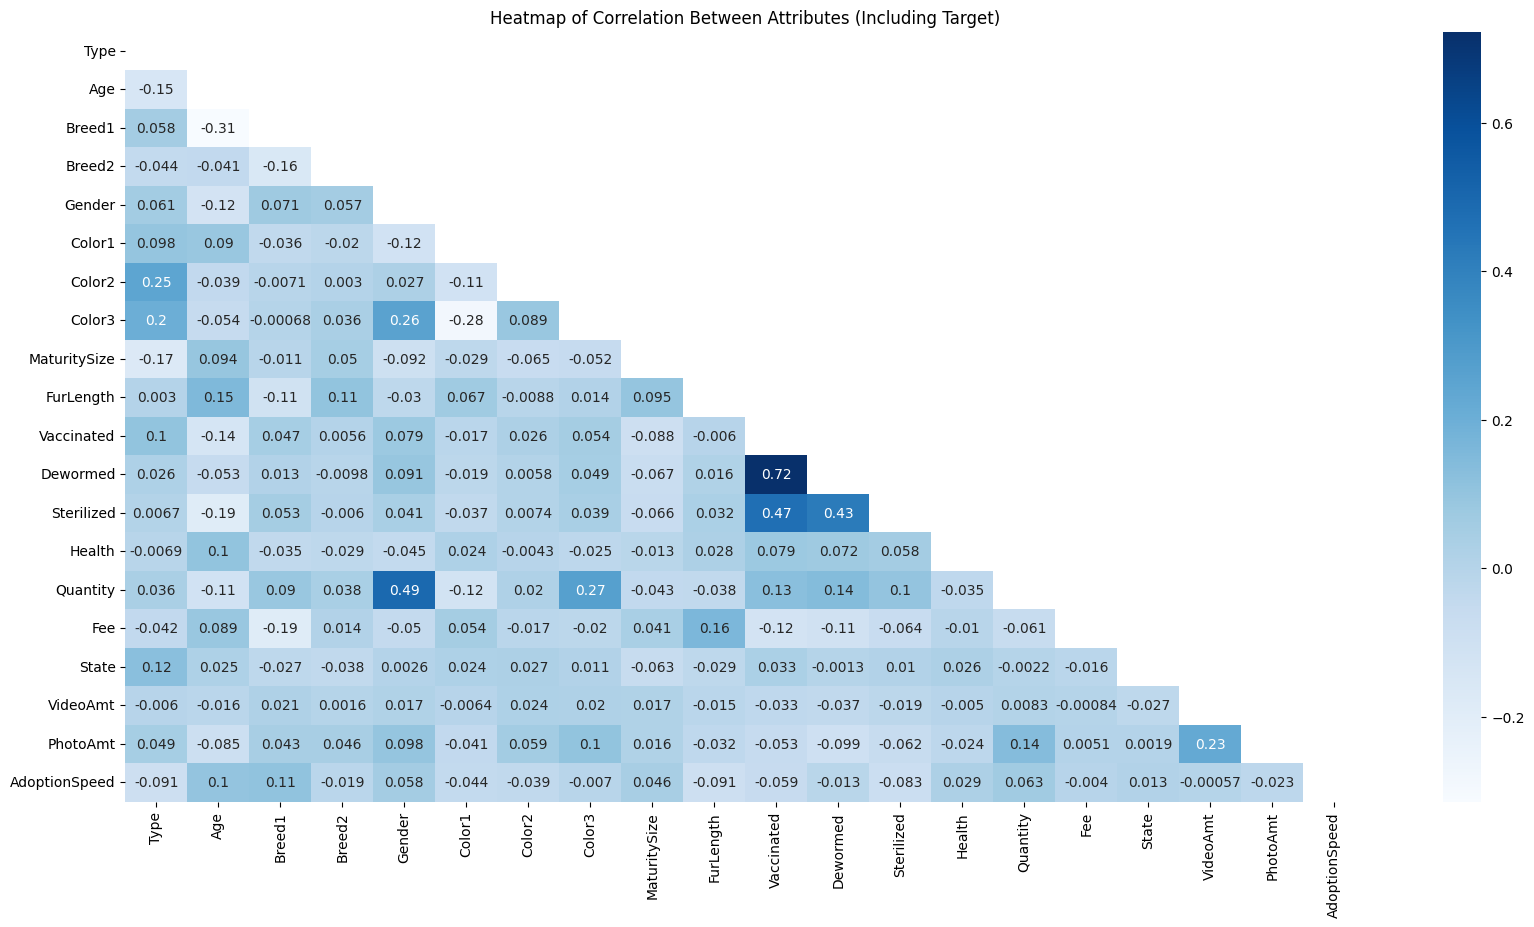

In [33]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(20,10),facecolor = "white")

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

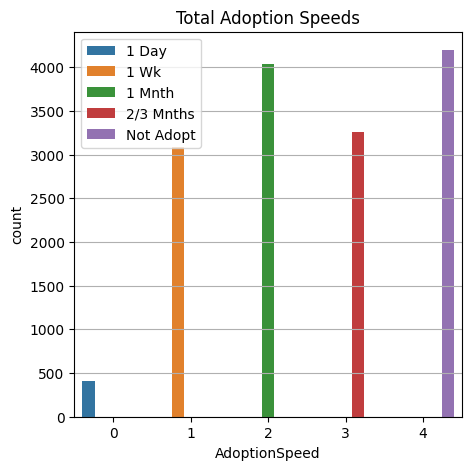

In [34]:
#Adoption Speeds
fig,ax = plt.subplots(figsize = (5,5))
a = sns.countplot(data = train_df, x ="AdoptionSpeed",  hue = "AdoptionSpeed", ax =ax)
ax.set_title("Total Adoption Speeds")
ax.legend(["1 Day","1 Wk", "1 Mnth", "2/3 Mnths", "Not Adopt"])
ax.grid(which ="both", axis = "y")

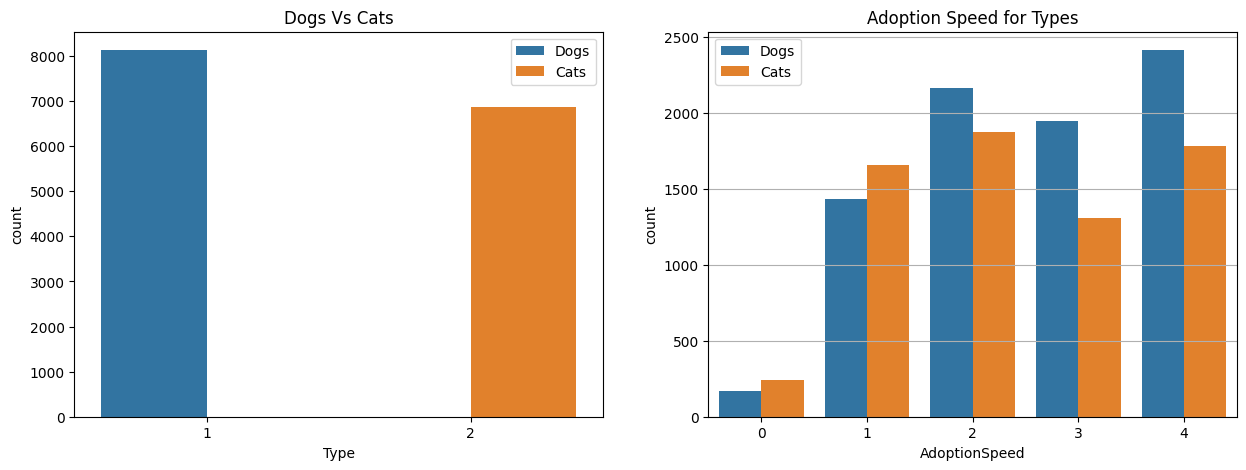

In [35]:
#Plot Cats versus dogs and adoption
fig,ax = plt.subplots(1,2,figsize =(15,5))

sns.countplot(x = "Type",hue = "Type", data = train_df, ax =ax[0])
ax[0].set_title("Dogs Vs Cats")
ax[0].legend(["Dogs","Cats"])

cplot = sns.countplot(x = "AdoptionSpeed",hue = "Type", data = train_df, ax =ax[1])
ax[1].set_title("Adoption Speed for Types")
ax[1].legend(["Dogs","Cats"])
ax[1].grid(which ="both", axis = "y")

In [36]:
#Age and Adoptionspeed Crosstab
pd.crosstab(train_df["AdoptionSpeed"], train_df["Age"])

Age,0,1,2,3,4,5,6,7,8,9,...,132,135,144,147,156,168,180,212,238,255
AdoptionSpeed,,,,,,,,,,,,,,,,,,,,,
0,10,54,115,44,24,7,20,7,4,5,...,0,0,0,0,0,0,0,0,0,0
1,50,643,865,408,211,100,80,43,36,24,...,1,0,0,1,0,0,0,0,0,0
2,44,754,1120,586,265,157,117,59,68,51,...,1,0,1,0,1,0,0,0,0,0
3,39,511,783,458,260,135,115,62,70,31,...,3,1,1,0,0,1,1,2,0,0
4,36,342,620,470,349,196,226,110,131,73,...,3,0,2,0,0,0,1,1,1,2


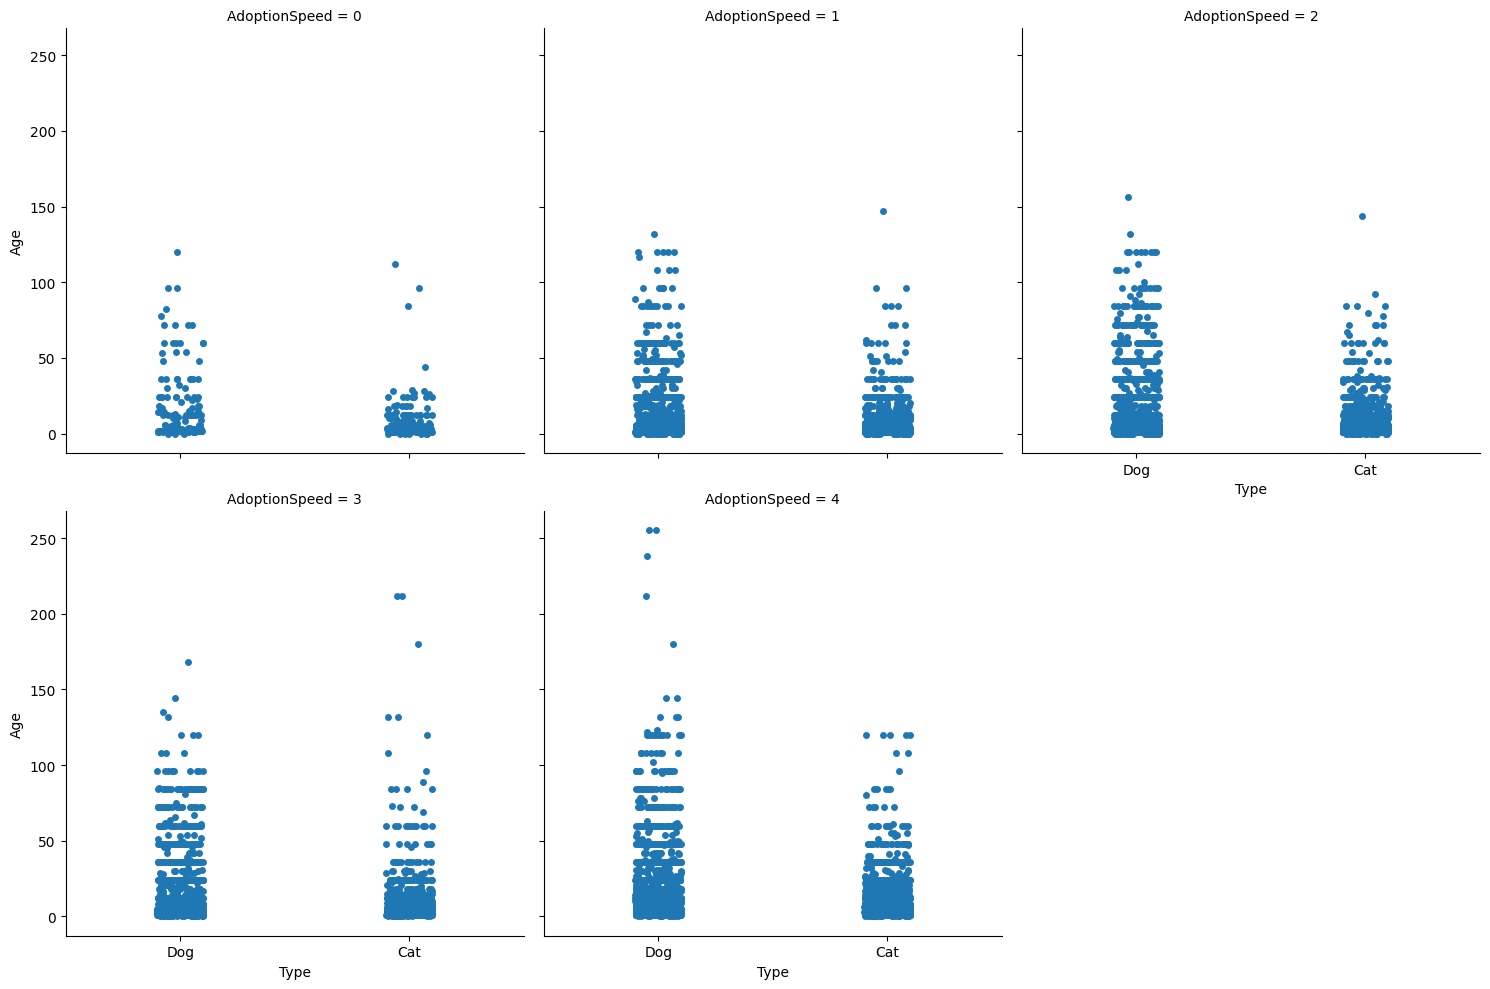

In [37]:
#Exploring Age and Gender
ag = sns.catplot(data = train_df, y = "Age", x = "Type", col_wrap = 3, col = "AdoptionSpeed")
ag.set_xticklabels(["Dog","Cat"])
#ag.set(ylim=(0,100))
#Check

In [38]:
train_df["Gender"].value_counts()
#With multiple quantities

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

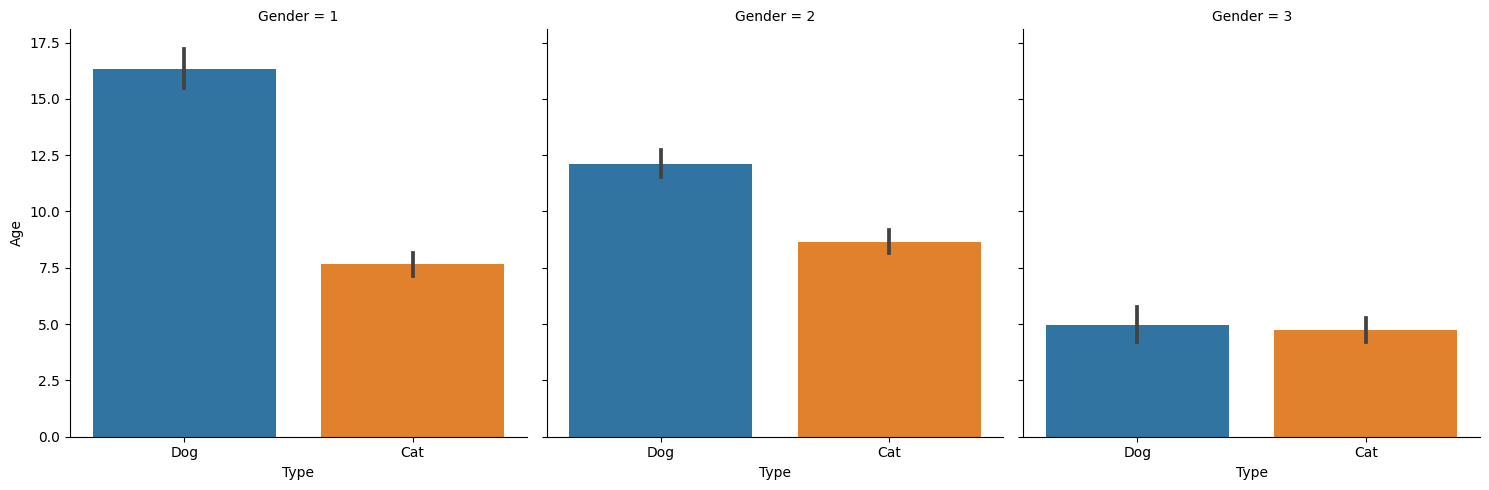

In [39]:
#Age, Type, Gender
ag = sns.catplot(data = train_df, y = "Age", x = "Type", col = "Gender", kind = "bar")
ag.set_xticklabels(["Dog","Cat"])


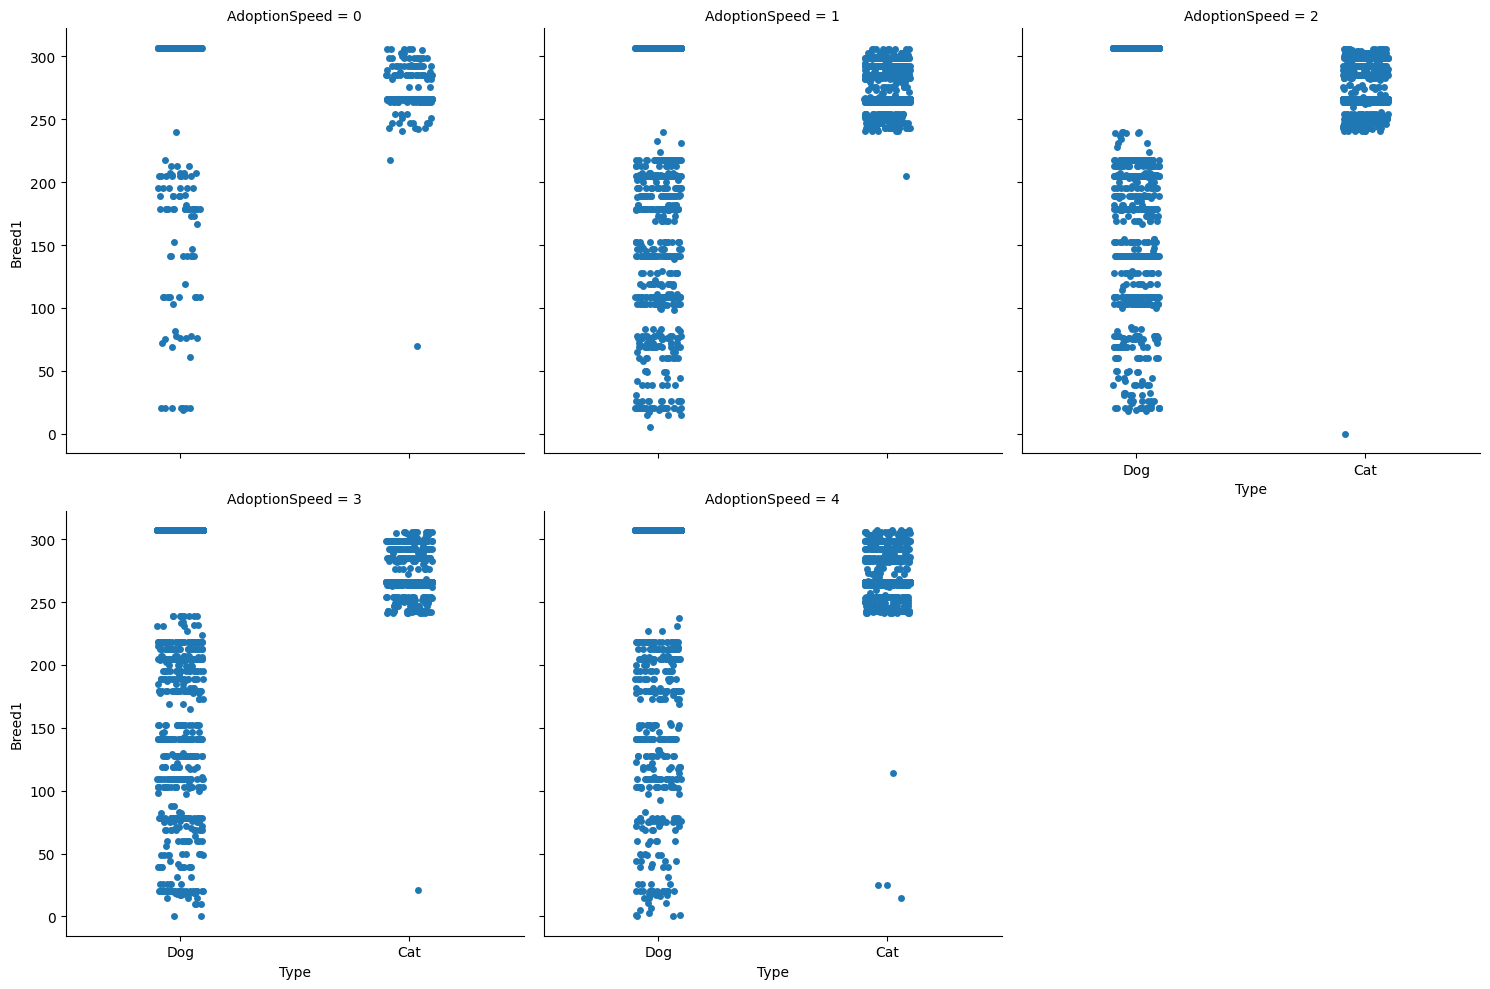

In [40]:
#Adoption Speed and Gender
#Age, Type, Gender
ag = sns.catplot(data = train_df, y = "Breed1", x = "Type",col_wrap = 3, col = "AdoptionSpeed")
ag.set_xticklabels(["Dog","Cat"])


In [41]:
#Breed
(breed_df["Type"] ==1).sum()

241

[(0.0, 310.0)]

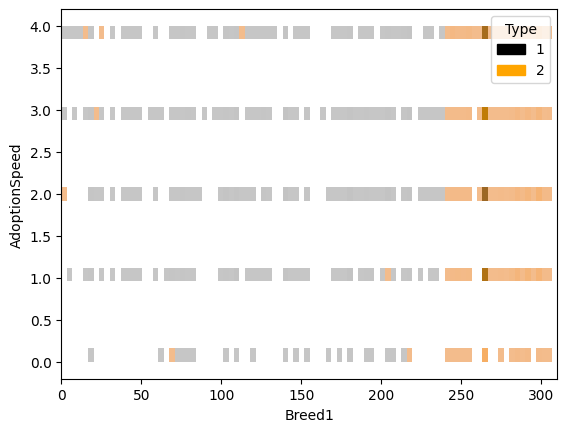

In [42]:
#Breed and Adoption Speed
ag = sns.histplot(data = train_df, y = "AdoptionSpeed", x = "Breed1", palette= {1:"black",2:"orange"},hue = "Type", multiple = "fill", bins = "auto")
ag.set(xlim=(0,310))

In [43]:
#Create two tables on counting, sorting breeds by Adoption....Breed index Adoption Values

In [44]:
#Looking at how animals are listed
pd.crosstab(train_df["AdoptionSpeed"], train_df["Quantity"])

Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
AdoptionSpeed,,,,,,,,,,,,,,,,,,,
0,331,35,20,13,7,1,0,2,0,1,0,0,0,0,0,0,0,0,0
1,2439,290,158,106,42,29,11,7,4,2,0,0,0,0,1,0,0,0,1
2,3163,362,181,129,90,51,22,15,9,3,3,2,1,0,0,2,2,0,2
3,2552,307,148,97,65,38,21,12,11,2,1,2,0,0,1,0,1,0,1
4,3080,428,219,186,129,66,30,16,9,11,6,2,1,2,2,1,0,1,8


[(0.0, 15.0)]

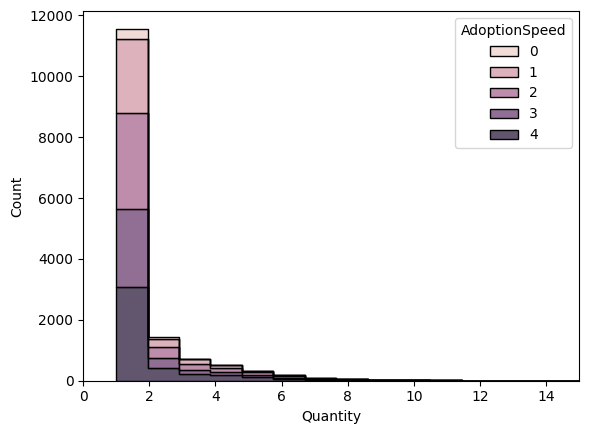

In [45]:
#AdoptionSpeed, Type, Gender Histogram
ag = sns.histplot(data = train_df,x  = "Quantity",hue = "AdoptionSpeed",multiple = "stack", element= "step", bins = 20)
ag.set(xlim = (0,15))

Feature Engineering
https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423Bin the speed categories for ease of the business problem

In [46]:
#Describe the data sources and explain why the data are suitable for the project
#Present the size of the dataset and descriptive statistics for all features used in the analysis
#Justify the inclusion of features based on their properties and relevance for the project
#Identify any limitations of the data that have implications for the project


In [47]:
#Create a new dataframe for dropped tracks for end evaluation
drop_df =train_df[["Name","Description","RescuerID","PetID"]].copy()

#Drop uneeded columns
main_df = train_df.drop(columns=["Name","Description","RescuerID","PetID"], axis = 1)

In [48]:
#If profile represents multiple bets, we will separate out or delete

In [49]:
#Convert target variable to two types 1- Adopted, 0- Not Adopted (Old 3 or less)

main_df["AdoptionSpeed"] = main_df["AdoptionSpeed"].replace([0,1,2,3],1) 
main_df["AdoptionSpeed"] = main_df["AdoptionSpeed"].replace([4],0) 
main_df["AdoptionSpeed"].value_counts()

1    10796
0     4197
Name: AdoptionSpeed, dtype: int64

[Text(0, 0, 'Dog'), Text(1, 0, 'Cat')]

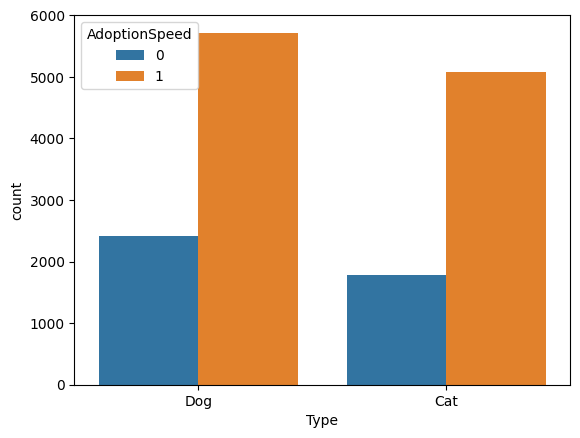

In [50]:
#AdoptionSpeed of Types of animals
ag = sns.countplot(x = "Type",hue = "AdoptionSpeed", data = main_df)
ag.set_xticklabels(["Dog","Cat"])

In [51]:

#Train Test Split of the Data for Modeling
X = main_df.drop("AdoptionSpeed", axis = 1)
y = main_df["AdoptionSpeed"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

In [52]:
#Checking to see if the value counts are stratified for imbalance
print(y_train.value_counts())
print(y_test.value_counts())


1    8096
0    3148
Name: AdoptionSpeed, dtype: int64
1    2700
0    1049
Name: AdoptionSpeed, dtype: int64


## Main Functions

## Data Preparation

In [62]:
#Fit and predict with an instatiated model
def fit_pred(instatiated_model):
    """ This function takes an instatiated model fits it then predicts the train and test target.
    The prediction and prediction probabilities are returned for the train and test variables."""
    #Fit training data
    instatiated_model.fit(X_train,y_train)
    #Predict with Train
    y_train_pred = instatiated_model.predict(X_train)
    y_train_pred_prob  = instatiated_model.predict_proba(X_train)
    #Predict with Test
    y_test_pred = instatiated_model.predict(X_test)
    y_test_pred_prob  = instatiated_model.predict_proba(X_test)
    
    return  y_train_pred, y_train_pred_prob,y_test_pred, y_test_pred_prob

In [82]:
#Calculating precision, recall, f1, acc
def calc_metrics(y_true,y_pred):
    """ Calculates and returns precision, recall, f1, acc metrics from the true and predicted values."""
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred,normalize = True)

    print ("The Precision mean score is: {}".format(np.round(precision,2)))
    print ("The Recall mean score is: {}".format(np.round(recall,2)))
    print ("The F1  score is: {}".format(np.round(f1,2)))
    print ("The Accuracy mean score is: {}".format(np.round(acc,2)))
    print("\n")
    return precision, recall, f1, acc,

In [120]:
def conf_matrix(y_true,y_pred):
    """Prints confusion matrix for the Adopted and Not adopted true and predicted values. """
    
    fig, ax = plt.subplots(1,2, figsize = (13,4), facecolor = "white")
    
    ax[0].set_title("Confusion Matrix")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize=None, display_labels= ["Not", "Adopted"], ax= ax[0])
    ax[1].set_title("Confusion Matrix: Normalized")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize="all", display_labels= ["Not", "Adopted"], ax= ax[1])

In [65]:
def plot_curves(estimator,X,y):
    """Plot the ROC Curve and the Precision Recall Curve.
    These are plotted against the orinal dummy classifier"""
    fig, ax = plt.subplots(1,2, figsize = (10,4), facecolor = "white")
    ax[0].set_title("Precision Recall Curve")
    PrecisionRecallDisplay.from_estimator(estimator,X,y,ax = ax[0])
    PrecisionRecallDisplay.from_estimator(dummy_clf,X,y,ax = ax[0])
    ax[1].set_title("ROC Curve")
    RocCurveDisplay.from_estimator(estimator,X,y, ax = ax[1])
    RocCurveDisplay.from_estimator(dummy_clf,X,y, ax = ax[1])

## Modeling

### Model Iteration Sequence

- **Dummy Model**
- **Baseline**
    - Logistic Regression
    - KNN
    - XGBoost
    - Randon Forest
    - Neural Net
- **Pipeline and GridsearchCV**
    - Logistic Regression
    - KNN
    - XGBoost
    - Randon Forest
    - Neural Net
- **Extra: Image Recognition Modeling**
    - Baseline Neural Net
    - CNN
    - GridsearchCV


In [57]:
# Think About
# calculate precision-recall curve for different thresholds
#precision, recall, thresholds = precision_recall_curve(testy, probs) https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

## Change for Classification Model
### The following is the outline of each model iteration:

- Sequence <br>
- Compile <br>
- Summary <br>
- Fit <br>
- Predict <br>
- Conf_matrix <br>
- Eval report <br>
- Model Evaluation <br>

Each iteration will have slight changes for improvement.  They will be described more at the
General descriptions of specific iterations.

### The main metrics focused on are:
- **Recall, F1 Score, Loss (Primary)** <br>
- **and Accuracy (Secondary)**<br>

Because the goal is to minimized False Negatives of Pneumonia (predicting no Pneumonia, while there is). 
The True Positives will be looked at secondary.

There are a total of 10* model iterations with a Final Model. The model iterations are trained on the training data and tested on validation data. Both the training and validation data metrics will be displayed.

The Final Model will be chosen based on the main metrics. This final model will be used with the test data. 

In [58]:
## Main Parameters 

[Dummy Classifier- Abiheet Sahoo, 2020 ](https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers)

## Dummy Model

In [59]:
## Dummy Model
#Instantiating and fitting the model
dummy_clf = DummyClassifier(strategy="most_frequent") # Using Most Frequent strategy
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [60]:
#Cross Val results on training data
cv_results = cross_val_score(dummy_clf, X_train, y_train, cv=5)
cv_results.mean()

0.7200284744979579

In [61]:
cv_results = cross_val_score(dummy_clf, X_test, y_test, cv=5)
cv_results.mean()

0.720192256341789

### Baseline  Logistic Regression

In [66]:
#Instantiate
lr_simple = LogisticRegression(random_state = 42,penalty= "none") 
#Fit and Predict
lr_train_pred, lr_train_pred_prob,lr_test_pred, lr_test_pred_prob = fit_pred(lr_simple)

In [67]:
#Metrics
calc_metrics(y_train,lr_train_pred)

The Precision mean score is: 0.73
The Recall mean score is: 0.98
The F1  score is: 0.84
The AUC  score is: 0.72
The Accuracy mean score is: 0.72




(0.7268823099415205, 0.9825839920948617, 0.835609243697479, 0.7216293134115973)

Train Confusion Matrix:



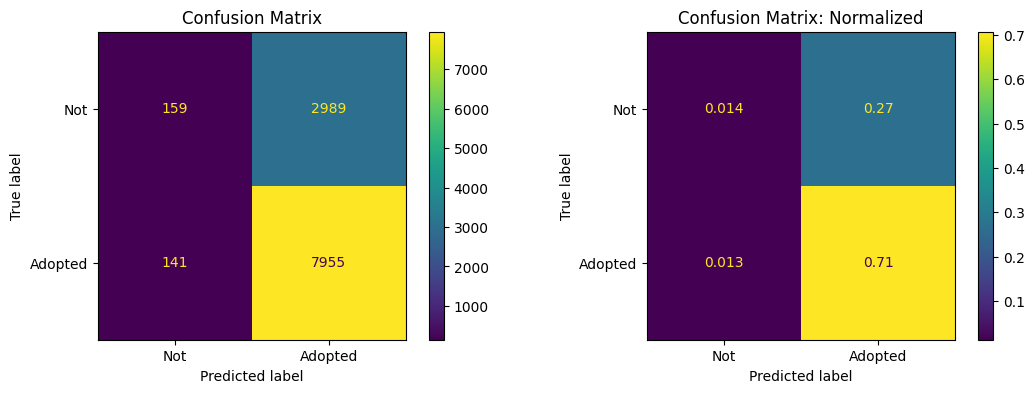

In [125]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,lr_train_pred)


Test Confusion Matrix:



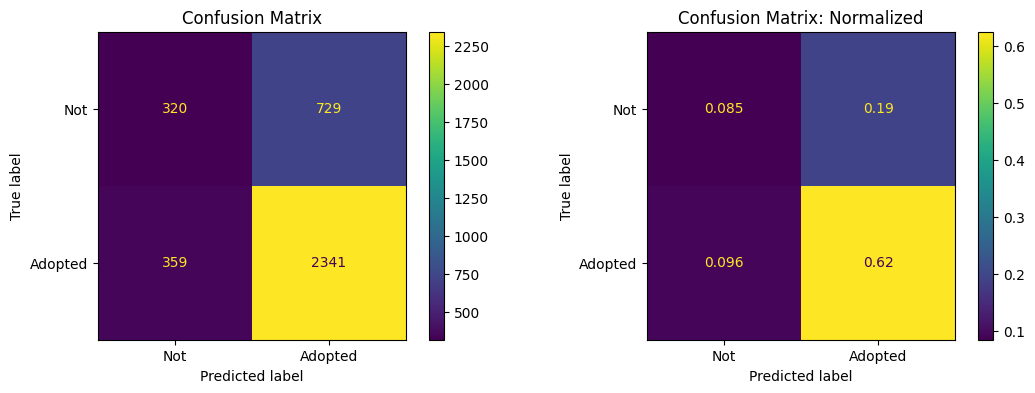

In [124]:
print("Test Confusion Matrix:\n")
conf_matrix(y_test,lr_test_pred)

In [69]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,lr_train_pred))
print("Test Classification Report:\n", classification_report(y_test, lr_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.05      0.09      3148
           1       0.73      0.98      0.84      8096

    accuracy                           0.72     11244
   macro avg       0.63      0.52      0.46     11244
weighted avg       0.67      0.72      0.63     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.06      0.10      1049
           1       0.73      0.98      0.84      2700

    accuracy                           0.72      3749
   macro avg       0.63      0.52      0.47      3749
weighted avg       0.67      0.72      0.63      3749



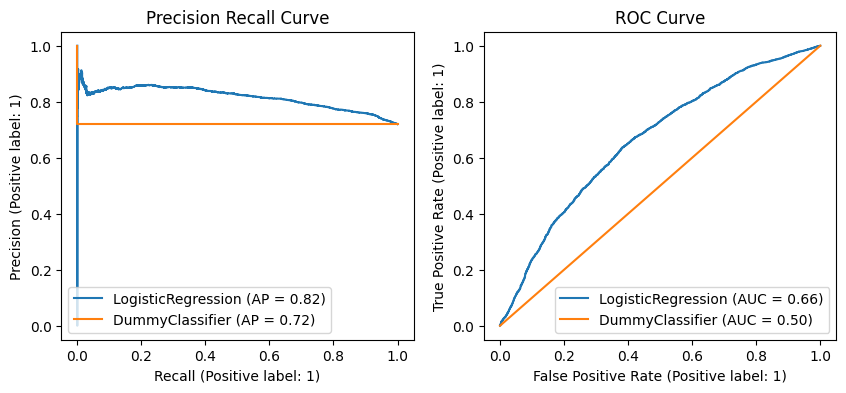

In [70]:
#Print Precision/Recall and AUC Score
plot_curves(lr_simple,X_train,y_train)

### Baseline KNN


In [71]:
#Plotting kNN https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6


In [74]:
#Scale Data for KNN
#Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,1.090724,0.091764,0.011792,-0.601135,1.783919,-0.706659,-0.073983,1.382086,-1.555370,-0.773829,0.403609,0.638162,0.158040,-0.181514,2.323709,-0.281784,-0.621566,-0.165863,0.599026
1,1.090724,0.147419,-0.004909,1.553418,0.320978,2.710591,-1.169018,-0.630282,0.255792,0.895255,-1.091179,-0.800966,0.158040,-0.181514,0.287884,-0.281784,-0.621566,-0.165863,-0.258410
2,-0.916822,-0.464789,-2.075809,1.894894,-1.141963,-0.137118,1.386065,-0.630282,0.255792,0.895255,0.403609,0.638162,0.158040,-0.181514,-0.390725,-0.281784,1.682514,-0.165863,-0.830035
3,1.090724,0.091764,0.329107,1.545288,-1.141963,-0.706659,1.386065,-0.630282,2.066955,0.895255,-1.091179,-0.800966,-1.617191,-0.181514,-0.390725,2.337981,-0.621566,-0.165863,2.313899
4,-0.916822,0.759627,-1.173966,1.894894,-1.141963,-0.706659,-1.169018,-0.630282,0.255792,0.895255,-1.091179,-0.800966,0.158040,-0.181514,-0.390725,-0.281784,-0.621566,-0.165863,-0.544223


In [79]:
#Instantiate
knn_simple = KNeighborsClassifier()

#Fit and Predict
knn_train_pred,_,knn_test_pred,_= fit_pred(knn_simple)

In [83]:
#Metrics
calc_metrics(y_train,knn_train_pred)

The Precision mean score is: 0.82
The Recall mean score is: 0.93
The F1  score is: 0.87
The Accuracy mean score is: 0.8




(0.819672131147541, 0.9325592885375494, 0.8724793436181892, 0.8037175382426183)

Train Confusion Matrices:

Test Confusion Matrices:



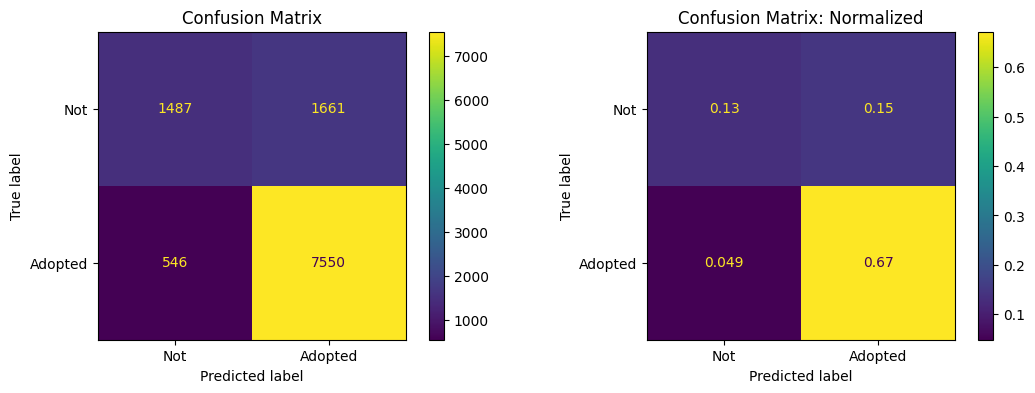

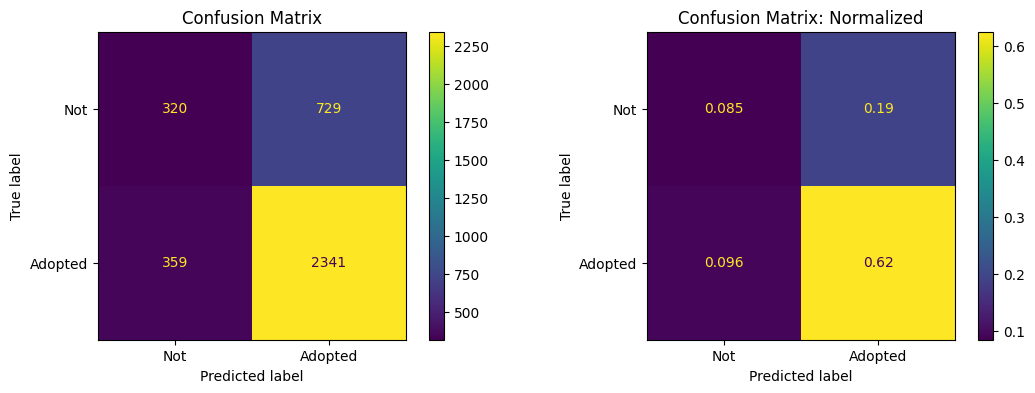

In [127]:
#Confusion Matrix
print("Train Confusion Matrices:\n")
conf_matrix(y_train,knn_train_pred)


In [ ]:
print("Test Confusion Matrices:\n")
conf_matrix(y_test,knn_test_pred)

In [85]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,knn_train_pred))
print("Test Classification Report:\n", classification_report(y_test, knn_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.47      0.57      3148
           1       0.82      0.93      0.87      8096

    accuracy                           0.80     11244
   macro avg       0.78      0.70      0.72     11244
weighted avg       0.79      0.80      0.79     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.31      0.37      1049
           1       0.76      0.87      0.81      2700

    accuracy                           0.71      3749
   macro avg       0.62      0.59      0.59      3749
weighted avg       0.68      0.71      0.69      3749



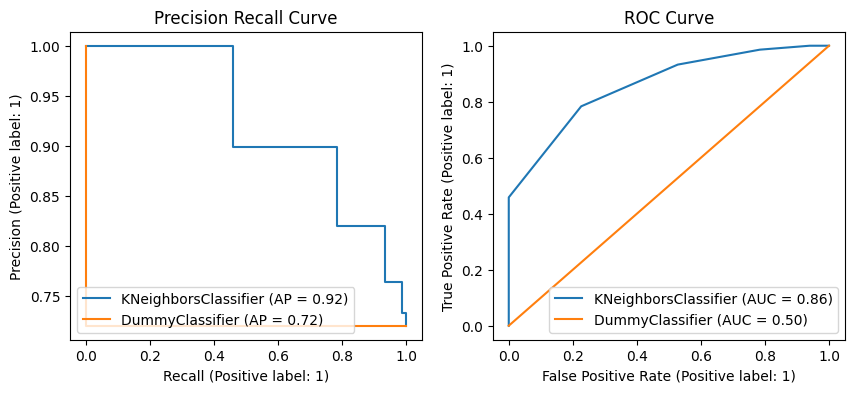

In [86]:
#Print Precision/Recall and AUC Score
plot_curves(knn_simple,X_train,y_train)

### Baseline XGBoost

In [ ]:
## Baseline XGBoost #https://github.com/learn-co-curriculum/dsc-pca-and-pipelines-v2-1/tree/solution

In [87]:
#Instantiate
xgb_simple = XGBClassifier(random_state = 42)

#Fit and Predict
xgb_train_pred,_,xgb_test_pred,_= fit_pred(xgb_simple)

In [128]:
#Metrics
calc_metrics(y_train,xgb_train_pred)

The Precision mean score is: 0.87
The Recall mean score is: 0.96
The F1  score is: 0.92
The Accuracy mean score is: 0.87




(0.8748732965424034,
 0.9594861660079052,
 0.9152282768777614,
 0.8720206332266097)

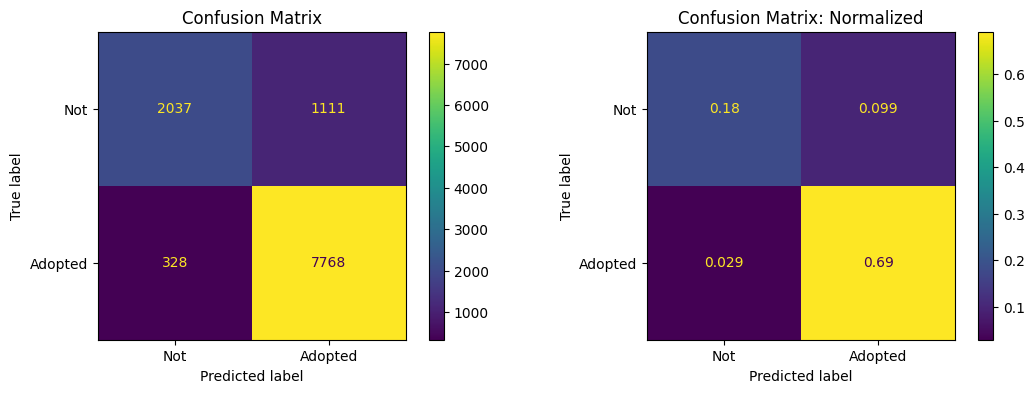

In [130]:
#Confusion Matrix
conf_matrix(y_train,xgb_train_pred)

Train Confusion Matrices:



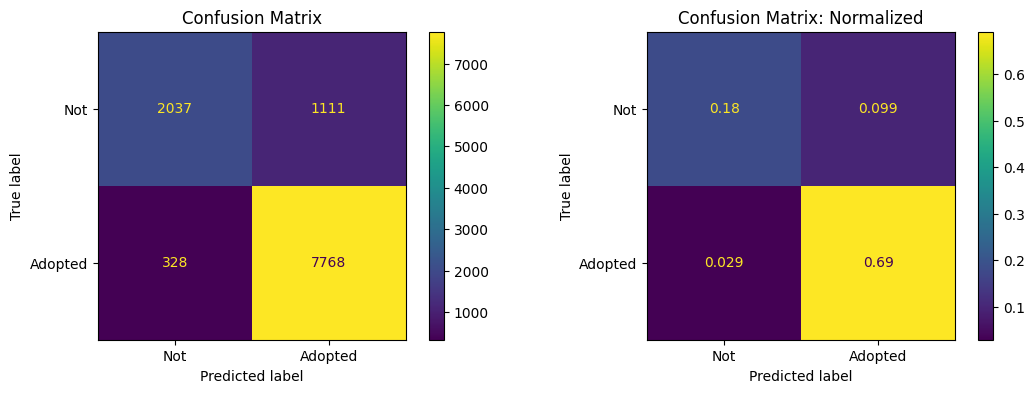

In [131]:
#Confusion Matrix
print("Train Confusion Matrices:\n")
conf_matrix(y_train,xgb_train_pred)


Test Confusion Matrices:



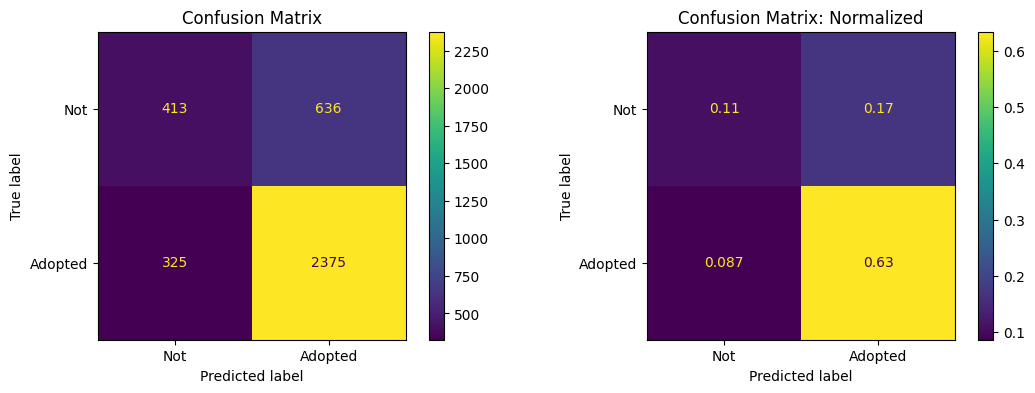

In [132]:
print("Test Confusion Matrices:\n")
conf_matrix(y_test,xgb_test_pred)

In [133]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,xgb_train_pred))
print("Test Classification Report:\n", classification_report(y_test, xgb_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74      3148
           1       0.87      0.96      0.92      8096

    accuracy                           0.87     11244
   macro avg       0.87      0.80      0.83     11244
weighted avg       0.87      0.87      0.87     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.39      0.46      1049
           1       0.79      0.88      0.83      2700

    accuracy                           0.74      3749
   macro avg       0.67      0.64      0.65      3749
weighted avg       0.72      0.74      0.73      3749



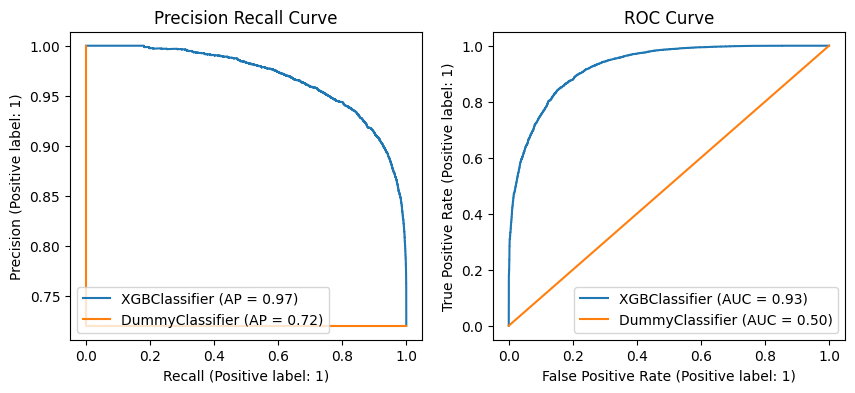

In [134]:
#Print Precision/Recall and AUC Score
plot_curves(xgb_simple,X_train,y_train)

### Random Forest Baseline


In [135]:
#Instantiate
rf_simple = RandomForestClassifier(random_state = 42) 

#Fit and Predict
rf_train_pred,_,rf_test_pred,_= fit_pred(rf_simple)

In [137]:
#Metrics
calc_metrics(y_test,rf_test_pred)

The Precision mean score is: 0.79
The Recall mean score is: 0.9
The F1  score is: 0.84
The Accuracy mean score is: 0.75




(0.7850919651500484,
 0.9011111111111111,
 0.8391101914123125,
 0.7511336356361696)

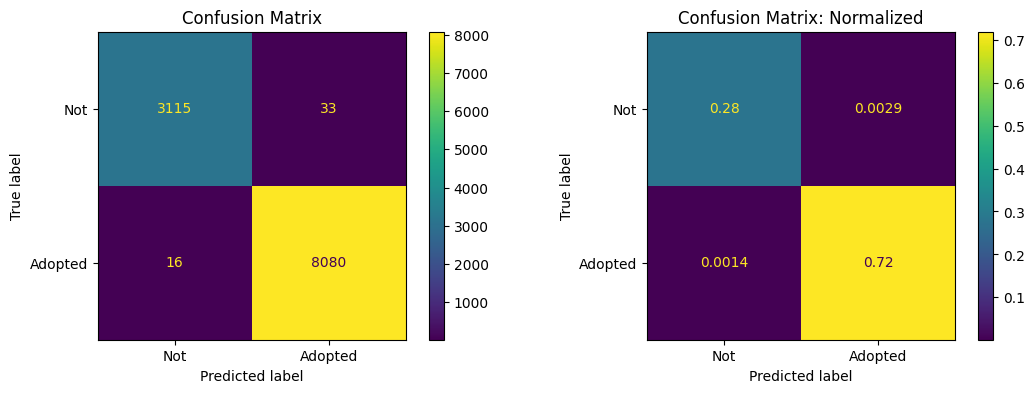

In [138]:
#Confusion Matrix
conf_matrix(y_train,rf_train_pred)

Test Confusion Matrices:



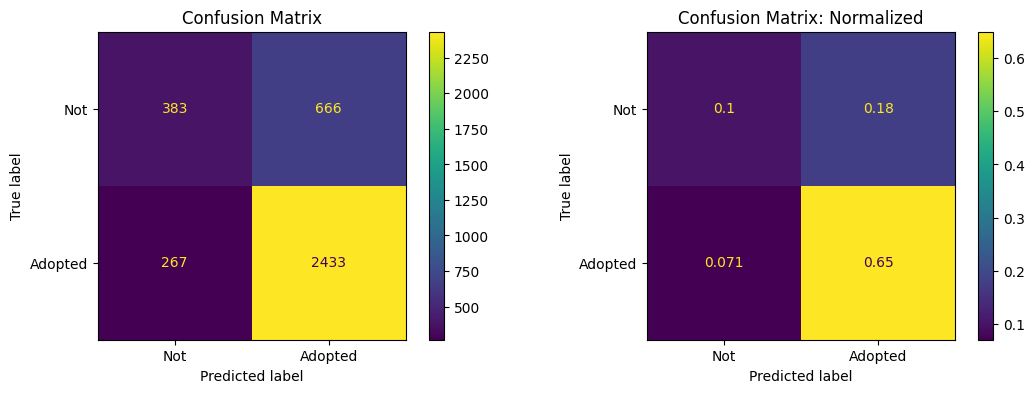

In [139]:
print("Test Confusion Matrices:\n")
conf_matrix(y_test,rf_test_pred)

In [140]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,rf_train_pred))
print("Test Classification Report:\n", classification_report(y_test, rf_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3148
           1       1.00      1.00      1.00      8096

    accuracy                           1.00     11244
   macro avg       1.00      0.99      0.99     11244
weighted avg       1.00      1.00      1.00     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.37      0.45      1049
           1       0.79      0.90      0.84      2700

    accuracy                           0.75      3749
   macro avg       0.69      0.63      0.64      3749
weighted avg       0.73      0.75      0.73      3749



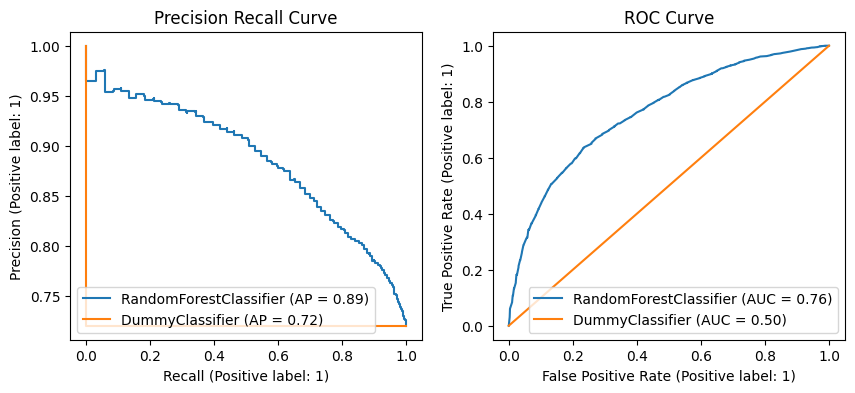

In [142]:
#Print Precision/Recall and AUC Score
plot_curves(rf_simple,X_test,y_test)

In [153]:
#Printing metric subplots of training and validation per epoch
def eval_metrics(history):
    """ Plots Train and Validation metrics["acc","loss","recall","precision"]
    from a model's evaluation results."""
    
    fig, ax = plt.subplots(1,4, figsize = (25,5))
    fig.suptitle('Model Metrics Results')
    
    metrics = ["loss","recall","acc","precision"]   
    
    for i, metric in enumerate(metrics):
    
        ax[i].plot(history.history[metric])
        ax[i].plot(history.history["val_" + metric])
        ax[i].set_title('Model {}'.format(metric))
        ax[i].set_ylabel(metric)
        ax[i].set_xlabel("Epochs")
        ax[i].legend(['train', 'val'])

### Recurrent Neural Net Baseline

In [144]:
# Use scaled data from KNN
scaled_df_train.shape

(11244, 19)

In [146]:
nn_model = Sequential([
Dense(5, activation='tanh', input_shape=(19,)),
Dense(1, activation='sigmoid')])

Metal device set to: Apple M2 Max


2023-04-04 03:38:09.455651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-04 03:38:09.455815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [148]:
nn_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc',"Recall","Precision"])

In [152]:
nn_results = nn_model.fit(scaled_df_train, y_train, epochs=15, batch_size=250, validation_split=0.2)

Epoch 1/15
36/36 [==============================] - 1s 16ms/step - loss: 0.5612 - acc: 0.7246 - recall: 0.9790 - precision: 0.7300 - val_loss: 0.5567 - val_acc: 0.7283 - val_recall: 0.9792 - val_precision: 0.7347
Epoch 2/15
36/36 [==============================] - 1s 18ms/step - loss: 0.5608 - acc: 0.7248 - recall: 0.9785 - precision: 0.7303 - val_loss: 0.5565 - val_acc: 0.7288 - val_recall: 0.9792 - val_precision: 0.7351
Epoch 3/15
36/36 [==============================] - 0s 9ms/step - loss: 0.5604 - acc: 0.7251 - recall: 0.9783 - precision: 0.7305 - val_loss: 0.5562 - val_acc: 0.7297 - val_recall: 0.9792 - val_precision: 0.7357
Epoch 4/15
36/36 [==============================] - 0s 9ms/step - loss: 0.5600 - acc: 0.7247 - recall: 0.9777 - precision: 0.7305 - val_loss: 0.5560 - val_acc: 0.7301 - val_recall: 0.9792 - val_precision: 0.7361
Epoch 5/15
36/36 [==============================] - 0s 9ms/step - loss: 0.5597 - acc: 0.7248 - recall: 0.9779 - precision: 0.7305 - val_loss: 0.5558 -

In [159]:
#Get results of neural net prediction
#nn_results.history.

In [ ]:
#Metrics
#calc_metrics(y_test,rf_test_pred)

In [ ]:
#Confusion Matrix
#conf_matrix(y_train,rf_train_pred)

In [ ]:
#Printing out Test data classification report with scores 
#print("Train Classification Report:\n", classification_report(y_train,nn_train_pred))
#print("Test Classification Report:\n", classification_report(y_test, nn_test_pred))

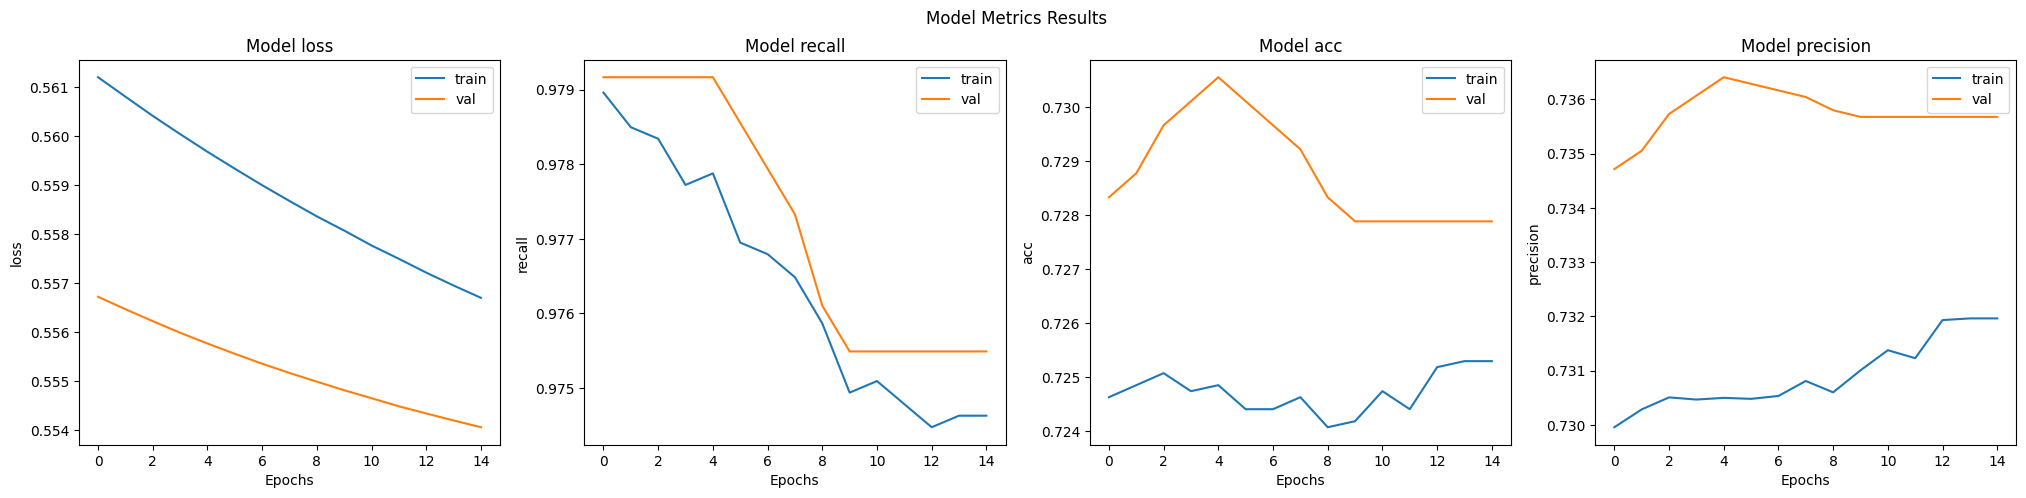

In [154]:
##How to plot AUC and Precision Recall Score for Neural Netl

## Iteration 2 Hypertuning w/ SMOTE
https://towardsdatascience.com/10-hyperparameter-optimization-frameworks-8bc87bc8b7e3

In [162]:
#Hyper parameter turning
from ray.tune.sklearn import TuneGridSearchCV 



In [ ]:
### Logistic Regression GridsearchCV

In [ ]:
### KNN

In [ ]:
### XGBoost

In [ ]:
### Random Forest

In [ ]:
### Neural Net
https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

### Extra: CNN Imaging (Time Permitting)



### Final Model

## Evaluation

### Conclusion

### Reccomendations

### Limitations